In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
# ¿Sobre que columnas podremos eliminar o reemplazar los outliers?
# Identifica visualmente los outliers
# Identifica sobre el dataframe las filas que son outliers
# Reemplaza los outliers por el estadístico más correcto.
# Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.

In [5]:
df = pd.read_csv("pairs_limpieza.csv", index_col = 0)
df.head(5)

,case_number,year,type,country,area,location,activity,name,age,time,species_,injury,fecha_limpia,fatal_clean,sexo
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,"FATAL, all onboard were killed by sharks",NaN,Y,F
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,FATAL,May,Y,NaN
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,NaN,NaN,NaN,"FATAL, PROVOKED INCIDENT",Sep,Y,M
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,NaN,NaN,"FATAL, ""bitten in two""",NaN,Y,F
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,"No injury to occupants, shark bit oar and rudder",May,N,NaN


Vamos a investigar los outliers de nuestra columna **year** del df

In [7]:
df["year"].unique()

array([1800, 1797, 1792, 1791, 1788, 1787, 1786, 1785, 1784, 1783, 1780,
       1779, 1776, 1771, 1767, 1764, 1758, 1753, 1751, 1749, 1755, 1748,
       1742, 1738, 1733, 1723, 1721, 1703, 1700, 1642, 1638, 1637, 1617,
       1595, 1580, 1555, 1554, 1543,  500,   77,    5,    0, 2018, 2017,
       2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 19

Con esto confirmamos que no hay nans de ningún tipo, por lo que podemos calcular los cuartiles con **percentile** y no **nanpercentile**

Vamos a realizart un analásis gráfico de nuestra columna mediante un boxplot, para ello, seguimos los siguientes pasos:

1.Calculamos los cuartiles de nuestra columna

In [9]:
q3 = np.percentile(df["year"], 75)
q3

2005.0

In [10]:
q1 = np.percentile(df["year"], 25)
q1

1942.0

2.Vamos a calcular el rango intercuartílico (IQR)

In [12]:
iqr = q3 - q1
iqr

63.0

3.Calculamos los limites superiores e inferiores (los bigotes de nuestro box plot)

In [13]:
limit_sup = q3 + 1.5 * iqr

In [14]:
limit_inf = q1 - 1.5 * iqr

4.Vamos a dibujar nuestro gráfico de boxplot para echar un vistazo a nuestros datos

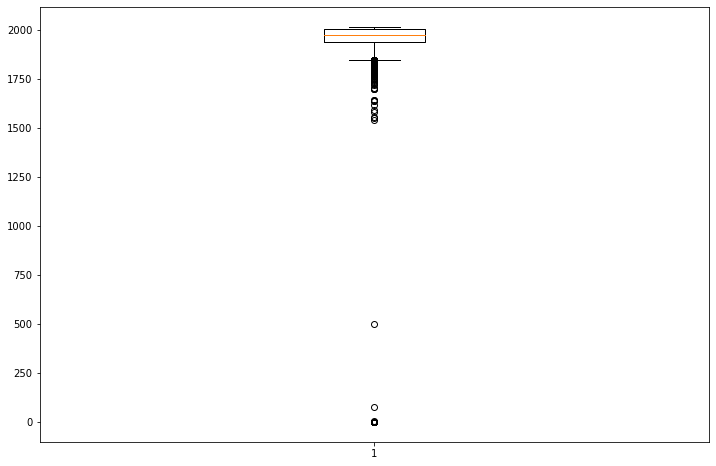

In [27]:
fig = plt.figure(figsize=(12,8))
plt.boxplot(df["year"])
plt.show()

Observamos en nuestros datos que existen 4 valores en la columna ***year*** muy atípicos, el 0 y 5, 77 y 500. Asumimos que esos valores han sido mal registrados y que no son representativos del conjunto.

Ahora pasamos a investigar qué hacer con esos 4 valores, si reemplazarlos o eliminarlos, y después observar cómo se queda nuestro boxplot sin ellos o con ellos modificados.

Vamos a probar a eliminarlos

- Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
¿Sobre que columnas podremos eliminar o reemplazar los outliers?
Identifica visualmente los outliers
Identifica sobre el dataframe las filas que son outliers
Reemplaza los outliers por el estadístico más correcto.
- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.

Identificamos las filas que son outliers gracias un filtrado.

In [23]:
outliers_data = df[(df["year"] < q1 - limit_inf) | (df["year"] > q3 + limit_sup)]
outliers_data


,case_number,year,type,country,area,location,activity,name,age,time,species_,injury,fecha_limpia,fatal_clean,sexo
43,0077.00.00,77,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,NaN,NaN,NaN,FATAL,NaN,Y,M
44,0005.00.00,5,Unprovoked,australia,New South Wales,Bondi,NaN,male,NaN,NaN,NaN,Aboriginal rock carving depicts man being atta...,NaN,N,M
45,0000.0214,0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",NaN,NaN,NaN,"FATAL, shark/s bit him in two",214,Y,M
46,0000.0336,0,Unprovoked,greece,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,NaN,NaN,NaN,"FATAL, shark ""bit off all lower parts of him u...",336,Y,M
47,0000.0493,0,Sea Disaster,greece,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,NaN,NaN,NaN,Herodotus tells of sharks attacking men in the...,493,Y,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,ND.0005,0,Unprovoked,australia,Western Australia,Roebuck Bay,Diving,male,NaN,NaN,NaN,FATAL,NaN,Y,M
166,ND.0004,0,Unprovoked,australia,Western Australia,NaN,Pearl diving,Ahmun,NaN,NaN,NaN,FATAL,NaN,Y,M
167,ND.0003,0,Unprovoked,usa,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,NaN,NaN,NaN,FATAL,NaN,Y,M
168,ND.0002,0,Unprovoked,panama,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,NaN,NaN,NaN,FATAL,NaN,Y,M


Por qué desaparece nuestro outlier 500? gráficamente sí está, pero después del filtrado no.

In [28]:
outliers_data["year"].value_counts()

0     125
77      1
5       1
Name: year, dtype: int64

In [29]:
outliers_data["year"].unique()

array([77,  5,  0])

###############################################
Hemos decidido eliminar los outliers de los outliers (valores 5, 77) porque son únicamente 2 valores y reemplazaríamos los valores 0 por otro estadístico robusto que no modifique la distribución de nuestros datos: Mediana.

Reemplazamos los outliers por el estadístico más correcto: la mediana.

In [ ]:
x = list(outliers_data.index)
x

In [ ]:
# ejemplo de diccionario que se viene a la cabeza: 
# {0 : [23, 25, 75 .................]
# 5 : [25]
# 77 : 36}

GUARDAR EN CSV

In [ ]:
df.to_csv('pairs_limpieza.csv')